In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np

sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2

In [11]:
hermes3.case_db

AttributeError: module 'hermes3' has no attribute 'case_db'

In [14]:
constants()

TypeError: constants() missing 1 required positional argument: 'name'

In [4]:
db = CaseDB(
    case_dir = r"/users/mjk557/scratch/cases/st40",
    grid_dir = r"/users/mjk557/scratch/cases"
    )

choice = "b3d-try80eV"
# choice = "b3a-t3-small_temp_steps"

case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a5-fatter.nc"],
                    double_load = True)

/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])


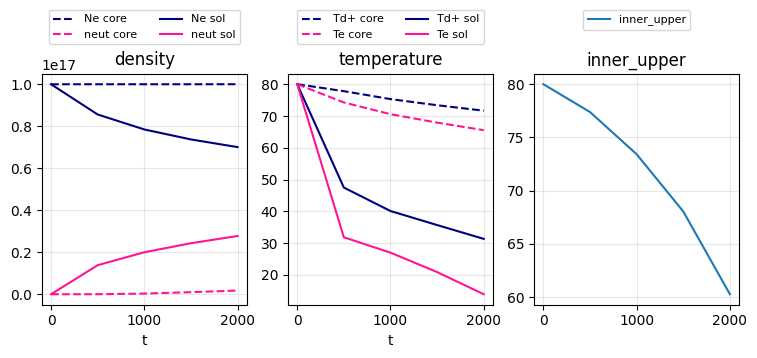

In [10]:
Monitor(caseng, [["density", "temperature", "target_temp"]])

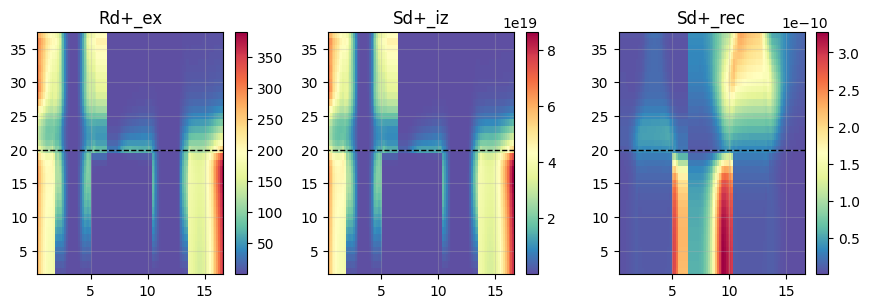

In [22]:
Monitor2D(caseng, "grid", [["Rd+_ex", "Sd+_iz", "Sd+_rec"]])

In [23]:
Monitor2D(caseng, "pcolor", [["Rd+_ex", "Sd+_iz", "Sd+_rec"]])

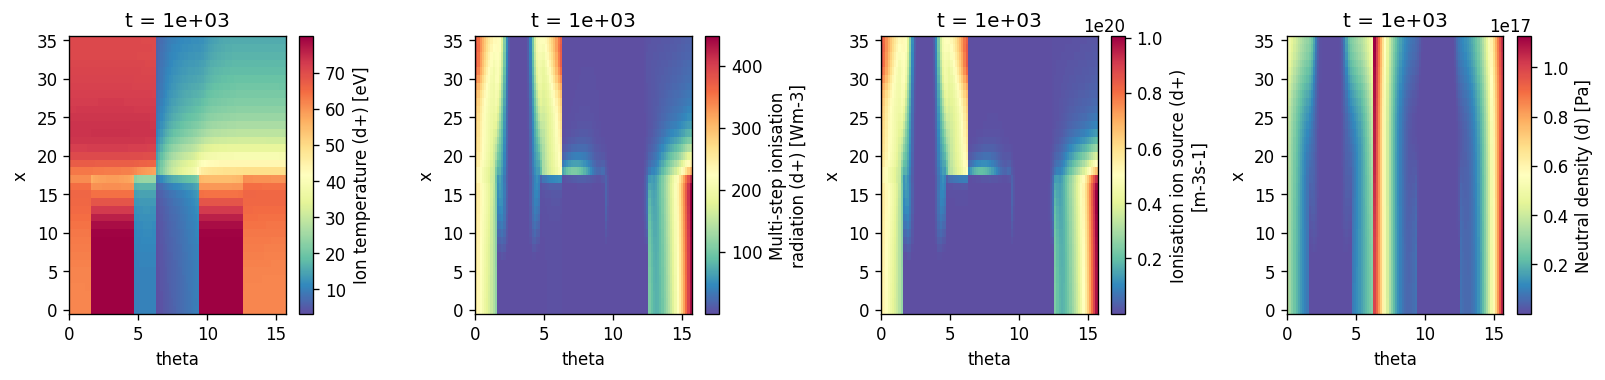

In [7]:
data = self.ds

cols = 4
fig, axes = plt.subplots(1,cols, figsize = (cols*4,3), dpi = 120)
fig.subplots_adjust(wspace = 0.5)
# fig.tight_layout(pad = 1)
time = self.ds["t"][-1]

data["Td+"].sel(t=time).plot(ax = axes[0], cmap = "Spectral_r",
# vmin = 53, vmax = 1600, 
)
(data["Rd+_ex"].sel(t=time)*-1).plot(ax = axes[1], cmap = "Spectral_r", 
)
data["Sd+_iz"].sel(t=time).plot(ax = axes[2], cmap = "Spectral_r",
# vmin = 1.1e15, vmax = 7.2e19, 
)
data["Nd"].sel(t=time).plot(ax = axes[3], cmap = "Spectral_r", 
# vmin = 9.7e13, vmax = 2.9e19, 
)
# [ax.set_ylim(-0.9,0) for ax in axes]
print("")

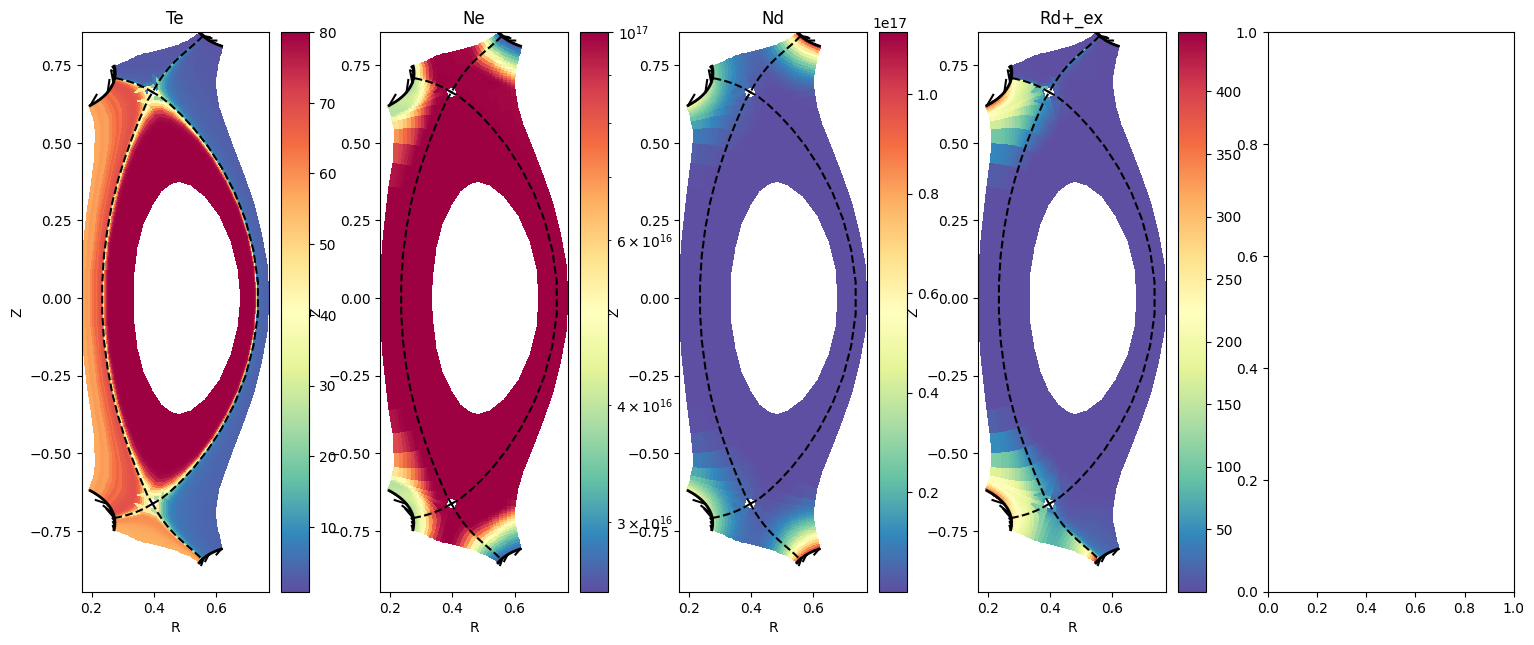

In [5]:
data = self.ds

cols = 5
fig, axes = plt.subplots(1,cols, figsize = (cols*3,6), dpi = 100)
# fig.subplots_adjust(wspace = 0)
fig.tight_layout(pad = 0.4)
tind = -1

data["Te"].isel(t=tind).bout.pcolormesh(ax = axes[0], cmap = "Spectral_r", logscale = False,
# vmin = 53, vmax = 1600, 
)

data["Ne"].isel(t=tind).bout.pcolormesh(ax = axes[1], cmap = "Spectral_r", logscale = True,
# vmin = 1.1e15, vmax = 7.2e19, 
)
data["Nd"].isel(t=tind).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False,
# vmin = 9.7e13, vmax = 2.9e19, 
)
(data["Rd+_ex"].isel(t=tind)*-1).bout.pcolormesh(ax = axes[3], cmap = "Spectral_r", logscale = False, 
)
# (data["Sd+_iz"].isel(t=tind)).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False, 
# )
# [ax.set_ylim(-0.9,0) for ax in axes]
print("")

In [5]:
import grid_fields
meshwrapper = grid_fields.Mesh(r"/users/mjk557/scratch/cases/st40/b2b-allsource_newmaster_scratch/g3a3f3-allflux_proper.nc")

m = meshwrapper.mesh

for param in ["Pd+_src", "Pe_src", "Nd+_src"]:
    print(f'\n-> {param}:')
    print(f'Set: {set(m[param].flatten())}')
    print(f'Integral: {(m[param].squeeze() * meshwrapper.dv).sum()}')



-> Pd+_src:
Set: {0.0, 15200943.283049459}
Integral: 1000000.0

-> Pe_src:
Set: {0.0, 11552716.895117588}
Integral: 760000.0

-> Nd+_src:
Set: {0.0, 2.280141492457419e+22}
Integral: 1.5e+21


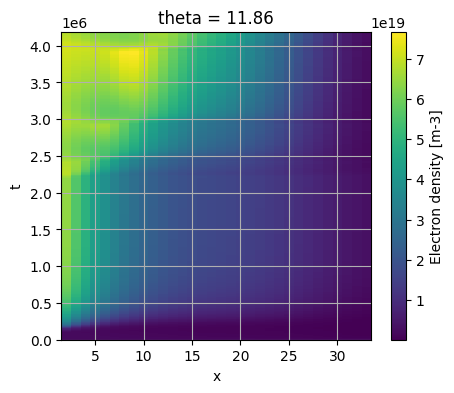

In [6]:
case = self

class Plane():
    def __init__(self, case, slicer):
        self.ds = case.ds.isel(x = slicer[0], theta = slicer[1]).copy()
        self.meta = case.ds.metadata
        
    
omp = Plane(case, case.slices("outer_midplane_a"))

fig, ax = plt.subplots(figsize = (5,4), dpi = 100)
# omp.ds["Ne"].isel(t=-1).plot(ax = ax)
omp.ds["Ne"].plot(ax = ax)
ax.grid()
# ax.set_ylim(1e17,1e20)
# ax.set_yscale("log")